## Programming Assignment

* Кластеризация: уменьшение количества цветов изображения

In [1]:
from sklearn.cluster import KMeans
import skimage
from skimage.io import imread
import pylab
import numpy as np
import pandas as pd
from math import log10

In [2]:
image = imread('parrots.jpg')

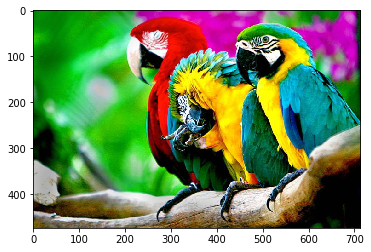

In [3]:
%matplotlib inline
pylab.imshow(image)

In [4]:
image = skimage.img_as_float(image)

In [5]:
image.shape

(474, 713, 3)

In [6]:
w, h = image.shape[:-1]
new_img = image.reshape(w * h, -1)
new_img

array([[0.01568627, 0.49411765, 0.01960784],
       [0.00784314, 0.49411765, 0.00784314],
       [0.00784314, 0.49411765, 0.00784314],
       ...,
       [0.02352941, 0.09019608, 0.11764706],
       [0.08235294, 0.16078431, 0.20392157],
       [0.0745098 , 0.16470588, 0.23529412]])

In [7]:
X = pd.DataFrame(new_img, columns=('R', 'G', 'B'))
X.head()

,R,G,B
0,0.015686,0.494118,0.019608
1,0.007843,0.494118,0.007843
2,0.007843,0.494118,0.007843
3,0.007843,0.494118,0.007843
4,0.007843,0.501961,0.011765


### Пиковое отношение сигнала к шуму (peak signal-to-noise ratio) 

In [8]:
def psnr(n, m):
    # MSE - mean square error
    mse = ((n - m) ** 2).mean()
    return 10 * log10(1. / mse)

In [9]:
kmeans = KMeans(init='k-means++', random_state=241)
X['pred'] = kmeans.fit_predict(X)
means = X.groupby('pred').mean().values

In [10]:
means

array([[0.05423468, 0.11682752, 0.05047563],
       [0.45177017, 0.66592356, 0.44071989],
       [0.61331377, 0.21417919, 0.06302829],
       [0.09561063, 0.63557924, 0.06684756],
       [0.95426566, 0.82764394, 0.04109478],
       [0.7874009 , 0.82310216, 0.79768653],
       [0.77700002, 0.0910021 , 0.69020856],
       [0.04562703, 0.55173992, 0.59907629]])

11 20.12734928551643 19.844475901876958


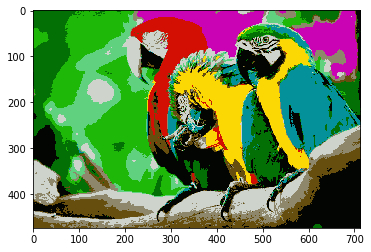

In [14]:
for i in range(1, 25):
    
    X = pd.DataFrame(new_img, columns=('R', 'G', 'B'))
    
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=241, n_jobs=-1) 
    X['pred'] = kmeans.fit_predict(X)
    
    means = X.groupby('pred').mean().values
    medians = X.groupby('pred').median().values
    
    set_new_colors = lambda data: np.reshape(list(map(lambda el: data[el], X['pred'])), (w, h, -1))
    
    mean_img = set_new_colors(means)
    median_img = set_new_colors(medians)
    
    pylab.imshow(mean_img)
    pylab.imshow(median_img)
    
    mean_psnr, median_psnr = psnr(image, mean_img), psnr(image, median_img)

    if mean_psnr > 20 or median_psnr > 20:
        print(i, mean_psnr, median_psnr)
        break